# COMMENT

본 과제는 and, or, nand gate를 **LEARNING**하여 xor gate를 표현하는 과제 였습니다.

learning하는 부분이 생략된 것을 제외하면 과제를 잘 수행 해 주셨습니다.

learning하는 부분은 모범 답안을 참고 해주시면 될 것 같습니다.

In [0]:
## Tensorflow 이용해서 AND , NAND , OR 게이트 만들고 3개의 gate 을 이용해 XOR 만드는게 숙제 입니다.

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
# Value
# 진리값을 구할 x1, x2를 정의
x1s, x2s = np.mgrid[0:2, 0:2]
x1s = x1s.flatten()
x2s = x2s.flatten()

tf.get_default_graph()
# boolean value로 변환
tfb_x1s = tf.cast(tf.constant(x1s), bool)
tfb_x2s = tf.cast(tf.constant(x2s), bool)

# 각 논리 함수 정의
and_gate_bool = tf.math.logical_and(tfb_x1s, tfb_x2s, name='logical_and')
or_gate_bool = tf.math.logical_or(tfb_x1s, tfb_x2s, name='logical_or')
nand_gate_bool = tf.math.logical_not(tf.math.logical_and(tfb_x1s, tfb_x2s, name='logical_nand'))
xor_gate_bool = tf.math.logical_and(nand_gate_bool, or_gate_bool, name='logical_xor')

# 논리함수 결과를 int type로 변환
and_gate = tf.cast(and_gate_bool, dtype='int32')
or_gate = tf.cast(or_gate_bool, dtype='int32')
nand_gate = tf.cast(nand_gate_bool, dtype='int32')
xor_gate = tf.cast(xor_gate_bool, dtype='int32')

# 변수 초기화 함수 정의
init = tf.global_variables_initializer()

# session run
with tf.Session() as sess:
    sess.run(init)
    print('Answer of And-gate is :', sess.run(and_gate))
    print('Answer of Or-gate is :', sess.run(or_gate))
    print('Answer of NAND-gate is :', sess.run(nand_gate))
    print('Answer of Xor-gate is :', sess.run(xor_gate))

Answer of And-gate is : [0 0 0 1]
Answer of Or-gate is : [0 1 1 1]
Answer of NAND-gate is : [1 1 1 0]
Answer of Xor-gate is : [0 1 1 0]


# COMMENT

In [0]:
# 시각화 부분 잘 해주셨습니다! 아래 코드에서 조금 개선 할 수 있는 부분은 반복문을 사용하는 것 입니다.
# 아래와 같은 식으로 중복코드를 제거 할 수 있습니다.

gates = [and_gate, or_gate, nand_gate, xor_gate]
ans_gates = sess.run(gates) # list가 반환됌

fig = plt.figure()
pos = 220
titles = ['AND_GATE', 'OR_GATE', 'NAND_GATE', 'XOR_GATE']
for i, (title, ans_gate) in enumerate(zip(titles, ans_gates)):
    ax = fig.add_subplot(pos + i)
    ax.scatter(x1v, x2v, ans_gate)
    ax.title(title)
    ax.xlim(0,1)
    ax.ylim(0,1)

plt.show()

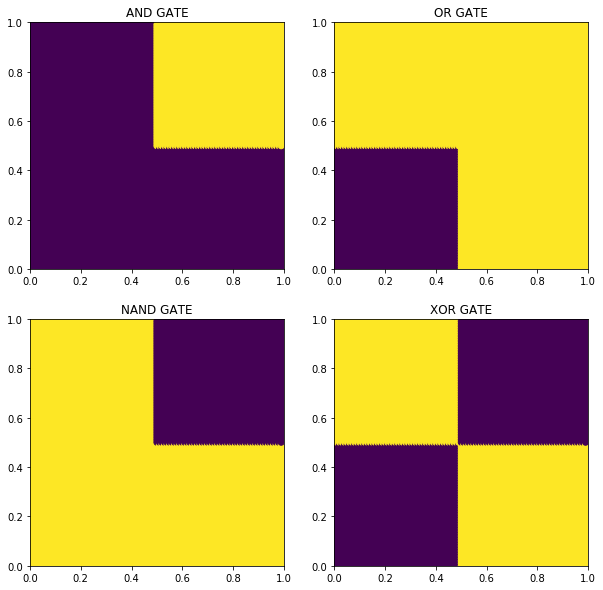

In [0]:
## Graph
# 진리값을 구할 x1, x2를 정의
x1s, x2s = np.mgrid[0:1:0.01, 0:1:0.01]
x1s = x1s.flatten()
x2s = x2s.flatten()
# graph를 그리기 위한 x축, y축 값 복사
x1v = np.copy(x1s)
x2v = np.copy(x2s)
# 논리식에 적용할 논리값 변환
for i in range(len(x1s)):
    if x1s[i] < 0.5:
        x1s[i]=0
    else:
        x1s[i]=1

for i in range(len(x2s)):
    if x2s[i] < 0.5:
        x2s[i]=0
    else:
        x2s[i]=1

tf.get_default_graph()
# boolean value로 변환
tfb_x1s = tf.cast(tf.constant(x1s), bool)
tfb_x2s = tf.cast(tf.constant(x2s), bool)

# 각 논리 함수 정의
and_gate_bool = tf.math.logical_and(tfb_x1s, tfb_x2s, name='logical_and')
or_gate_bool = tf.math.logical_or(tfb_x1s, tfb_x2s, name='logical_or')
nand_gate_bool = tf.math.logical_not(tf.math.logical_and(tfb_x1s, tfb_x2s, name='logical_nand'))
xor_gate_bool = tf.math.logical_and(nand_gate_bool, or_gate_bool, name='logical_xor')

# 논리함수 결과를 int type로 변환
and_gate = tf.cast(and_gate_bool, dtype='int32')
or_gate = tf.cast(or_gate_bool, dtype='int32')
nand_gate = tf.cast(nand_gate_bool, dtype='int32')
xor_gate = tf.cast(xor_gate_bool, dtype='int32')

# 변수 초기화 함수 정의
init = tf.global_variables_initializer()

# 결과값을 담을 list 정의
ans_and_gate = []
ans_or_gate = []
ans_nand_gate = []
ans_xor_gate = []

# session run
with tf.Session() as sess:
    sess.run(init)
    ans_and_gate = sess.run(and_gate)
    ans_or_gate = sess.run(or_gate)
    ans_nand_gate = sess.run(nand_gate)
    ans_xor_gate = sess.run(xor_gate)

# figure 공간 정의
plt.figure(figsize=(10,10))

# 1 번 graph: and gate
plt.subplot(221)
plt.scatter(x1v,x2v,c=ans_and_gate)
plt.title("AND GATE")
plt.xlim(0,1)
plt.ylim(0,1)
# 2 번 graph: or gate
plt.subplot(222)
plt.scatter(x1v,x2v,c=ans_or_gate)
plt.title("OR GATE")
plt.xlim(0,1)
plt.ylim(0,1)
# 3 번 graph: nand gate
plt.subplot(223)
plt.scatter(x1v,x2v,c=ans_nand_gate)
plt.title("NAND GATE")
plt.xlim(0,1)
plt.ylim(0,1)
# 4 번 graph: xor gate
plt.subplot(224)
plt.scatter(x1v,x2v,c=ans_xor_gate)
plt.title("XOR GATE")
plt.xlim(0,1)
plt.ylim(0,1)

plt.show()
